<a href="https://colab.research.google.com/github/Pathin220/4105_Project/blob/main/Project_3_matrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from IPython.display import display
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#mounting google drive
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/My Drive/Machine Learning/DataSets/DataSet3/heart.csv'
dataset = pd.DataFrame(pd.read_csv(file_path))
dataset.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.03260869565217391
Precision: 0.016211219336219336
Recall: 0.018691378066378064
F1 Score: 0.015596638655462186


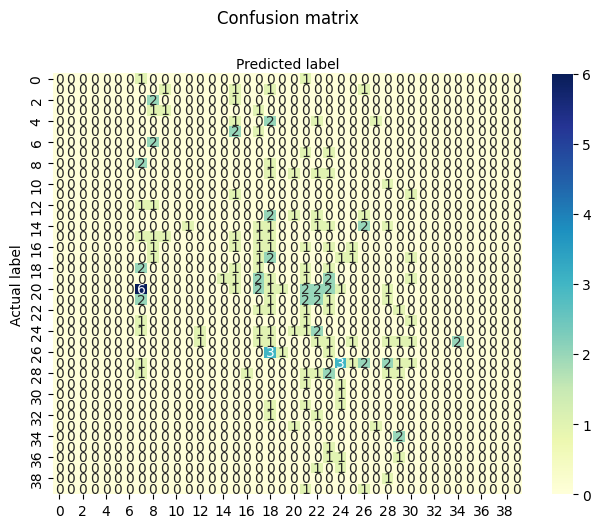

In [15]:
# One-hot encode the columns
dataset = pd.get_dummies(dataset, columns=['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope'], drop_first=True)


# Assuming 'output' is the target variable, adjust this based on your actual dataset
X = dataset.drop('Age', axis=1)
Y = dataset['Age']

np.random.seed(17)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=100)

# Scalar normalization
scalerMM = MinMaxScaler()
scalerSS = StandardScaler()

# Min Max or Standard normalize
X_train = scalerMM.fit_transform(X_train)
X_test = scalerMM.transform(X_test)

classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, Y_train)

Y_pred = classifier.predict(X_test)

print("Accuracy:", metrics.accuracy_score(Y_test, Y_pred))
# Use 'micro' average setting for multiclass problems
print("Precision:", metrics.precision_score(Y_test, Y_pred, average='macro'))
print("Recall:", metrics.recall_score(Y_test, Y_pred, average='macro'))
print("F1 Score:", metrics.f1_score(Y_test, Y_pred, average='macro'))

# Confusion matrix
cnf_matrix = confusion_matrix(Y_test, Y_pred)

# Plotting the confusion matrix
class_names = np.unique(Y)  # Use unique classes from the target variable
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

plt.show()

